**ME391: Final Project**

Christian Hollar

6 Input Keras Model for TSLA Price Prediction

Stock Price Settings: 2 Year Period & 1 Hour Interval Closing Prices

- Input 1: LSTM Tesla
- Input 2: LSTM Apple
- Input 3: LSTM Microsoft
- Input 4: LSTM Google
- Input 5: LSTM Amazon
- Input 6: Dense Technical Indicators

Stock Index LSTM:
Previous 100 Price Values -> Next Price Value

Technical Indicators:
- RSI
- Stochastic RSI
- Triple Exponential Moving Average
- MACD
- VWMA

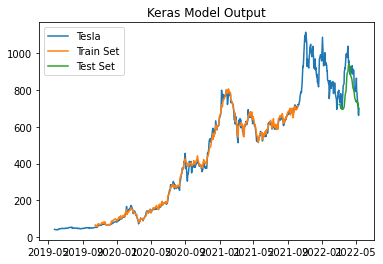

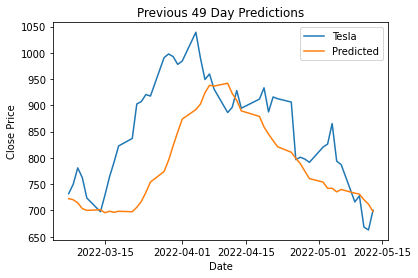

The test model demonstrates the ability to follow the general trend of Tesla which is demonstrated through the increased smoothness of the predicted curve. It's difficult to make any hard conclusions as the data follows the previous 3 years which have been exceptionally volatile as a result of exterior events like the pandemic. Therefore, I do not think overfitting/underfitting is visible. 

For future steps, I would further tune the hyper parameters. This would give me a better idea of the accuracy of the model. This includes both the batch size and the epochs. Additional hidden layers would most likely be beneficial before the concatenate step. 

Feature wise, I also would like to change the number of outside stocks included in the different LSTM input layers and change which stocks are being utilized. Tesla may have a more direct relationship with other electric vehicle or automotive stocks rather than general tech stocks. A variety may also prove to be beneficial in training a model. 

Technical indicators would also be worth changing. A literature review diving into pairing different indicators together and which are historically most relevant would be helpful in this process.



Required installs:

In [1]:
!pip install yfinance
!pip install stockstats

Imports:

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6


import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from stockstats import StockDataFrame

Using the yfinance library, download the stock of choice:
Top 5 Tech Stocks
- AAPL
- MSFT
- GOOG
- AMZN
- TSLA


In [3]:
df = yf.download(
        tickers = "AAPL MSFT GOOG AMZN TSLA",
        period = "3y",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
df = df.dropna()
df.head(), df.shape

[*********************100%***********************]  5 of 5 completed


(                   GOOG                                                  \
                    Open         High          Low        Close   Volume   
 Date                                                                      
 2019-05-14  1137.209961  1140.420044  1119.550049  1120.439941  1836600   
 2019-05-15  1117.869995  1171.329956  1116.666016  1164.209961  2289300   
 2019-05-16  1164.510010  1188.160034  1162.839966  1178.979980  1531400   
 2019-05-17  1168.469971  1180.150024  1160.010010  1162.300049  1208600   
 2019-05-20  1144.500000  1146.796997  1131.442993  1138.849976  1353300   
 
                  AAPL                                              ...  \
                  Open       High        Low      Close     Volume  ...   
 Date                                                               ...   
 2019-05-14  45.484785  46.287557  45.240781  46.033794  146118800  ...   
 2019-05-15  45.450626  46.787767  45.389625  46.585243  106178800  ...   
 2019-05-16  46

Using stockstats import, download the following technical indicators:
- RSI
- Stochastic RSI
- Triple Exponential Moving Average
- MACD
- VWMA

https://github.com/jealous/stockstats

In [4]:
df1 = StockDataFrame.retype(df['TSLA'][["Open", "Close", "High", "Low", "Volume"]])
df1.head()

,open,close,high,low,volume
Date,,,,,
2019-05-14,45.860001,46.462002,46.900002,45.599998,36262000
2019-05-15,45.863998,46.389999,46.487999,45.049999,36480000
2019-05-16,45.897999,45.666000,46.200001,45.299999,37416500
2019-05-17,44.391998,42.206001,44.448002,41.784000,88933500
2019-05-20,40.560001,41.071999,41.200001,39.049999,102631000


In [5]:
df1['rsi']
df1['stochrsi']
df1['tema']
df1['macd']
df1['vwma']
df1.head(), df1.shape

(                 open      close       high        low     volume  rs_14  rsi  \
 Date                                                                            
 2019-05-14  45.860001  46.462002  46.900002  45.599998   36262000    NaN  NaN   
 2019-05-15  45.863998  46.389999  46.487999  45.049999   36480000    0.0  0.0   
 2019-05-16  45.897999  45.666000  46.200001  45.299999   37416500    0.0  0.0   
 2019-05-17  44.391998  42.206001  44.448002  41.784000   88933500    0.0  0.0   
 2019-05-20  40.560001  41.071999  41.200001  39.049999  102631000    0.0  0.0   
 
             rsi_14  stochrsi       tema      macd     macds     macdh  \
 Date                                                                    
 2019-05-14     NaN       NaN  46.462002  0.000000  0.000000  0.000000   
 2019-05-15     0.0       NaN  46.394608 -0.001615 -0.000897 -0.000718   
 2019-05-16     0.0       NaN  45.767329 -0.024510 -0.010575 -0.013935   
 2019-05-17     0.0       NaN  42.851891 -0.159244 -0.

In [6]:
df1['AAPL'] = df['AAPL']['Close']
df1['MSFT'] = df['MSFT']['Close']
df1['GOOG'] = df['GOOG']['Close']
df1['AMZN'] = df['AMZN']['Close']
df1 = df1.dropna()
df1.head()

,open,close,high,low,volume,rs_14,rsi,rsi_14,stochrsi,tema,macd,macds,macdh,vwma,AAPL,MSFT,GOOG,AMZN
Date,,,,,,,,,,,,,,,,,,
2019-05-23,38.868000,39.098000,39.894001,37.243999,132735500,0.086681,7.976656,7.976656,100.000000,38.562736,-0.554690,-0.331182,-0.223508,41.245051,43.837761,122.736183,1140.770020,1815.479980
2019-05-24,39.966000,38.125999,39.995998,37.750000,70683000,0.074444,6.928610,6.928610,86.861085,37.943409,-0.639841,-0.402484,-0.237358,40.976002,43.669395,122.794556,1133.469971,1823.280029
2019-05-28,38.240002,37.740002,39.000000,37.570000,51564500,0.070205,6.560001,6.560001,82.239981,37.534382,-0.710819,-0.471569,-0.239250,40.775871,43.488838,122.716743,1134.150024,1836.430054
2019-05-29,37.419998,37.972000,38.478001,37.007999,59843000,0.107058,9.670534,9.670534,100.000000,37.636335,-0.739780,-0.530252,-0.209528,40.554709,43.281429,121.530029,1116.459961,1819.189941
2019-05-30,37.750000,37.644001,38.452000,37.403999,39632500,0.101371,9.204033,9.204033,95.176059,37.536198,-0.768966,-0.581518,-0.187448,40.426253,43.505917,122.298470,1117.949951,1816.319946


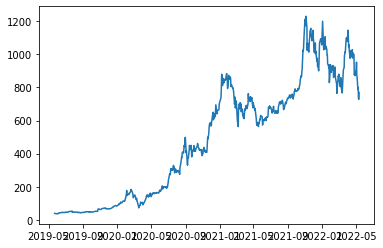

In [7]:
plt.plot(df1['close'])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
dftsla = scaler.fit_transform(np.array(df1['close']).reshape(-1,1))

dfaapl = scaler.fit_transform(np.array(df1['AAPL']).reshape(-1,1))
dfmsft = scaler.fit_transform(np.array(df1['MSFT']).reshape(-1,1))
dfgoog = scaler.fit_transform(np.array(df1['GOOG']).reshape(-1,1))
dfamzn = scaler.fit_transform(np.array(df1['AMZN']).reshape(-1,1))

rsi = scaler.fit_transform(np.array(df1['rsi']).reshape(-1,1))
stochrsi = scaler.fit_transform(np.array(df1['stochrsi']).reshape(-1,1))
tema = scaler.fit_transform(np.array(df1['tema']).reshape(-1,1))
macd = scaler.fit_transform(np.array(df1['macd']).reshape(-1,1))
vwma = scaler.fit_transform(np.array(df1['vwma']).reshape(-1,1))

In [9]:
dftsla

array([[0.0027669 ],
       [0.00195291],
       [0.00162966],
       [0.00182394],
       [0.00154927],
       [0.00103675],
       [0.        ],
       [0.00245035],
       [0.00295114],
       [0.00451882],
       [0.00427597],
       [0.00567952],
       [0.00638631],
       [0.00507321],
       [0.00585203],
       [0.00602119],
       [0.00771449],
       [0.00766592],
       [0.00794898],
       [0.00680838],
       [0.00718356],
       [0.00748169],
       [0.00683183],
       [0.00674976],
       [0.0073477 ],
       [0.00745154],
       [0.00807292],
       [0.0076341 ],
       [0.0093676 ],
       [0.00906612],
       [0.00860386],
       [0.00855696],
       [0.0100409 ],
       [0.00998731],
       [0.01107263],
       [0.01248288],
       [0.01229529],
       [0.01271066],
       [0.01248957],
       [0.01326672],
       [0.012848  ],
       [0.01360002],
       [0.01438889],
       [0.00834927],
       [0.00821863],
       [0.00951331],
       [0.01060031],
       [0.010

Declare the size of the training set to be approximatley 80% of the entire data set under evaluation:

In [10]:
training_size = round(len(dftsla)*0.8)
test_size = len(dftsla) - training_size
train_data, test_data = dftsla[:training_size,:],dftsla[training_size:,:1]

train_aapl, test_aapl = dfaapl[:training_size,:],dfaapl[training_size:,:1]
train_msft, test_msft = dfmsft[:training_size,:],dfmsft[training_size:,:1]
train_goog, test_goog = dfgoog[:training_size,:],dfgoog[training_size:,:1]
train_amzn, test_amzn = dfamzn[:training_size,:],dfamzn[training_size:,:1]

train_rsi, test_rsi = rsi[:training_size,:],rsi[training_size:,:1]
train_stochrsi, test_stochrsi = stochrsi[:training_size,:],stochrsi[training_size:,:1]
train_tema, test_tema = tema[:training_size,:],tema[training_size:,:1]
train_macd, test_macd = macd[:training_size,:],macd[training_size:,:1]
train_vwma, test_cwma = vwma[:training_size,:],vwma[training_size:,:1]

In [11]:
training_size,test_size

(601, 150)

In [12]:
len(train_data),len(test_data)

(601, 150)

Create X and Y datasets for LSTM:
- X is previous time_step prices
- Y is next price

In [13]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

Create X and Y datasets for technical indicators:
- X is technical indicator values for given price
- Y is given price

In [14]:
def technical_dataset(dataset, type, time_step = 1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = []
    if type == "test":
      a.extend([test_rsi[i+time_step,0],test_stochrsi[i+time_step,0],test_tema[i+time_step,0],test_macd[i+time_step,0],test_vwma[i+time_step,0]])
    elif type =="train":  
      a.extend([train_rsi[i+time_step,0],train_stochrsi[i+time_step,0],train_tema[i+time_step,0],train_macd[i+time_step,0],train_vwma[i+time_step,0]])
    dataX.append(a) 
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

Run functions for each stock and indicator:

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

X_aapl_train, y_aapl_train = create_dataset(train_aapl,time_step)
X_msft_train, y_msft_train = create_dataset(train_msft,time_step)
X_goog_train, y_goog_train = create_dataset(train_goog,time_step)
X_amzn_train, y_goog_train = create_dataset(train_amzn,time_step)

X_aapl_test, y_aapl_test = create_dataset(test_aapl,time_step)
X_msft_test, y_msft_test = create_dataset(test_msft,time_step)
X_goog_test, y_goog_test = create_dataset(test_goog,time_step)
X_amzn_test, y_goog_test = create_dataset(test_amzn,time_step)

X_tech_train, y_tech_train = technical_dataset(train_data,"train",time_step)
X_tech_test, y_tech_test = technical_dataset(test_data,"train",time_step)

In [16]:
X_train.shape, X_aapl_train.shape, X_aapl_test.shape,y_train.shape

((500, 100), (500, 100), (49, 100), (500,))

Reshape:

In [17]:
X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_aapl_train.reshape(X_aapl_train.shape[0],X_aapl_train.shape[1],1)
X_msft_train.reshape(X_msft_train.shape[0],X_msft_train.shape[1],1)
X_goog_train.reshape(X_goog_train.shape[0],X_goog_train.shape[1],1)
X_amzn_train.reshape(X_amzn_train.shape[0],X_amzn_train.shape[1],1)
X_tech_train.reshape(X_tech_train.shape[0],X_tech_train.shape[1],1)

X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_aapl_test.reshape(X_aapl_test.shape[0],X_aapl_test.shape[1],1)
X_msft_test.reshape(X_msft_test.shape[0],X_msft_test.shape[1],1)
X_goog_test.reshape(X_goog_test.shape[0],X_goog_test.shape[1],1)
X_amzn_test.reshape(X_amzn_test.shape[0],X_amzn_test.shape[1],1)
X_tech_test.reshape(X_tech_test.shape[0],X_tech_test.shape[1],1)

X_train.shape,X_aapl_train.shape,X_tech_train.shape,X_test.shape,X_aapl_test.shape

((500, 100), (500, 100), (500, 5), (49, 100), (49, 100))

In [18]:
X_test.shape[0]

49

Structure Model:
- 5 LSTM Input Layers: TSLA, AAPL, MSFT, GOOG, & AMZN
- 1 Dense Input Layer: RSI, STOCH RSI, TEMA, MACD, VWMA

In [19]:
# define two sets of inputs
lstm_input = Input(shape=(X_train.shape[1],1), name='lstm_input')
lstm_aapl_input = Input(shape=(X_train.shape[1],1), name='lstm_aapl_input')
lstm_msft_input = Input(shape=(X_train.shape[1],1), name='lstm_msft_input')
lstm_goog_input = Input(shape=(X_train.shape[1],1), name='lstm_goog_input')
lstm_amzn_input = Input(shape=(X_train.shape[1],1), name='lstm_amzn_input')

dense_input = Input(shape=(X_tech_train.shape[1],), name='tech_input')

x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
lstm_branch0 = Model(inputs=lstm_input, outputs=x)
 
# the second branch opreates on the second input
y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
technical_indicators_branch = Model(inputs=dense_input, outputs=y)

# a, b, c, d
a = LSTM(50, name='lstm_1')(lstm_aapl_input)
a = Dropout(0.2, name='lstm_dropout_1')(a)
lstm_branch1 = Model(inputs=lstm_aapl_input, outputs=a)

b = LSTM(50, name='lstm_2')(lstm_msft_input)
b = Dropout(0.2, name='lstm_dropout_2')(b)
lstm_branch2 = Model(inputs=lstm_msft_input, outputs=b)

c = LSTM(50, name='lstm_3')(lstm_goog_input)
c = Dropout(0.2, name='lstm_dropout_3')(c)
lstm_branch3 = Model(inputs=lstm_goog_input, outputs=c)

d = LSTM(50, name='lstm_4')(lstm_amzn_input)
d = Dropout(0.2, name='lstm_dropout_4')(d)
lstm_branch4 = Model(inputs=lstm_amzn_input, outputs=d)

Concatenate Step:

In [20]:
combined = concatenate([lstm_branch0.output, lstm_branch1.output, lstm_branch2.output,lstm_branch3.output, lstm_branch4.output, technical_indicators_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
model = Model(inputs=[lstm_branch0.input, lstm_branch1.input, lstm_branch2.input, lstm_branch3.input, lstm_branch4.input, technical_indicators_branch.input], outputs=z)

adam = tf.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=adam,
              loss='mse')

Fit Model:

In [21]:
model.fit(x=[X_train, X_aapl_train, X_msft_train, X_goog_train, X_amzn_train, X_tech_train], y=y_train, batch_size=75, epochs=100, shuffle=True, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 27s 2s/step - loss: 0.0421 - val_loss: 0.0191
Epoch 2/100
6/6 [==============================] - 3s 488ms/step - loss: 0.0254 - val_loss: 0.0020
Epoch 3/100
6/6 [==============================] - 3s 513ms/step - loss: 0.0190 - val_loss: 0.0091
Epoch 4/100
6/6 [==============================] - 3s 428ms/step - loss: 0.0115 - val_loss: 0.0078
Epoch 5/100
6/6 [==============================] - 2s 405ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 6/100
6/6 [==============================] - 3s 461ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 7/100
6/6 [==============================] - 1s 245ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 8/100
6/6 [==============================] - 1s 232ms/step - loss: 0.0041 - val_loss: 0.0065
Epoch 9/100
6/6 [==============================] - 1s 236ms/step - loss: 0.0037 - val_loss: 8.6934e-04
Epoch 10/100
6/6 [==============================] - 1s 235ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 1

Evaluate Model:

In [22]:
evaluation = model.evaluate([X_test, X_aapl_test, X_msft_test, X_goog_test, X_amzn_test, X_tech_test], y_test)
print(evaluation)

2/2 [==============================] - 0s 32ms/step - loss: 0.0070
0.006984570063650608


In [23]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 tech_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 lstm_input (InputLayer)        [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_aapl_input (InputLayer)   [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_msft_input (InputLayer)   [(None, 100, 1)]     0           []                               
                                                                                            

22:58

Predictions:

In [24]:
train_predict = model.predict([X_train, X_aapl_train, X_msft_train, X_goog_train, X_amzn_train, X_tech_train])
test_predict = model.predict([X_test, X_aapl_test, X_msft_test, X_goog_test, X_amzn_test, X_tech_test])

In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Plot Train/Test vs Real:

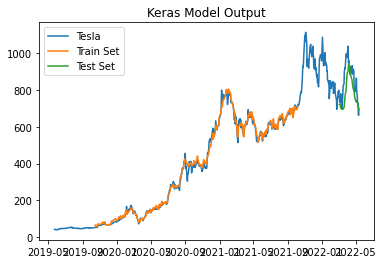

In [26]:
### Plotting 
# Time
time = np.array([df1.index])
time.shape, time[:10]
time = np.transpose(time)

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dftsla)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dftsla)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(time, scaler.inverse_transform(dftsla))
plt.plot(time, trainPredictPlot)
plt.plot(time, testPredictPlot)
plt.legend(['Tesla','Train Set','Test Set'])
plt.title('Keras Model Output')
plt.show()

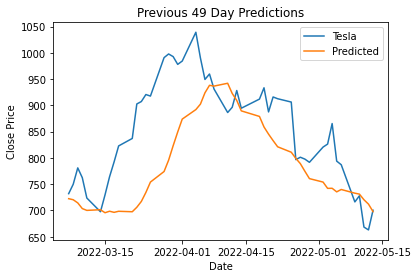

In [27]:
test_predict_length = len(test_predict)
tsla_real_plot = scaler.inverse_transform(dftsla)
plt.title('Previous ' + str(test_predict_length) + ' Day Predictions')
plt.plot(time[-test_predict_length:],tsla_real_plot[-test_predict_length:])
plt.plot(time[-test_predict_length:],test_predict)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Tesla','Predicted'])
plt.show()

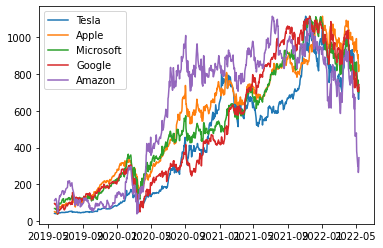

In [28]:
# Compare Real Prices of Each Stock
plt.plot(time,scaler.inverse_transform(dftsla))
plt.plot(time,scaler.inverse_transform(dfaapl))
plt.plot(time,scaler.inverse_transform(dfmsft))
plt.plot(time,scaler.inverse_transform(dfgoog))
plt.plot(time,scaler.inverse_transform(dfamzn))
plt.legend(['Tesla','Apple', 'Microsoft', 'Google', 'Amazon'])
plt.show()

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

460.28976164963274

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

789.3461064152776

References:
- https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe
- https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe
- https://youtu.be/H6du_pfuznE
